In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv('Dataset_final_V4.csv', index_col=0)
#df = df.drop(columns=['Unnamed: 0'])
df

,discount,price,discount_price,brand,feedbacks,rating,link,high_rating,memory_size,country,...,FrontCameraMP,SIMNumber,Wireless,CommunicStand,SatelliteNavig,Battery,InterfaceType,resolution,proportion,sales_count
name,,,,,,,,,,,,,,,,,,,,,
9 5G 4 6. 120 герц,36,21990,14073,Realme,1116,5,https://www.wildberries.ru/catalog/121028588/d...,1,128,Китай,...,16,2.0,Bluetooth; GPS; NFC; Wi-Fi,"GSM 1801; 2G, 3G, 5G, LTE","BeiDou , Galileo , A-GPS , GPS , ГЛОНАСС",5000,typ-c,2604960,2.233333,8600
Reno 7 8,43,27990,15954,OPPO,357,5,https://www.wildberries.ru/catalog/116872732/d...,1,128,Китай,...,32,2.0,NFC; Wi-Fi; Bluetooth; GPS,NaN,NaN,4500,"Type - C; Jack 3,5 mm",2592000,2.222222,4100
Reno 7 8,43,27990,15954,OPPO,288,5,https://www.wildberries.ru/catalog/116872733/d...,1,128,Китай,...,32,2.0,Bluetooth; GPS; NFC; Wi-Fi,NaN,NaN,4500,"Jack 3,5 mm; Type - C",2592000,2.222222,4100
SMART 6 PLUS 2,40,9990,5994,Infinix,1813,5,https://www.wildberries.ru/catalog/114477948/d...,1,64,Китай,...,5,2.0,Wi Fi; GPS; Blueooth,"2,3,4 G",GPS (спутник) + A-GPS + ГЛОНАСС,5000,Micro - USB,0,0.000000,5900
NOTE 12 2023 8,35,22990,14943,Infinix,118,5,https://www.wildberries.ru/catalog/128728547/d...,1,256,Китай,...,16,2.0,Bluetooth; GPS; NFC; Wi-Fi,2G; 3G; 4G,GPS,5000,"type C; Jack 3,5 мм",2592000,0.450000,900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M5 4 6.58 FHD MTK G99,18,16990,13931,Xiaomi POCO,2,5,https://www.wildberries.ru/catalog/106176120/d...,1,128,Китай,...,0,2.0,Wi-Fi; Bluetooth; NFC,LTE,A-GPS; GPS; Galileo,5000,type-c,2600640,2.229630,0
Redmi 10C,31,18990,13103,Xiaomi,2,5,https://www.wildberries.ru/catalog/90422386/de...,1,64,Китай,...,0,2.0,"4G , 3G , Wi-Fi , Bluetooth , 5.0 GPS , ГЛОНАСС",NaN,NaN,5000,Type - C,0,0.000000,20
Galaxy S5 SM-G900F,0,10990,10990,Samsung,1,1,https://www.wildberries.ru/catalog/96896454/de...,0,16,Китай,...,0,1.0,NaN,NaN,NaN,2800,NaN,2073600,1.777778,1


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1116 entries, 9 5G 4  6. 120 герц to 10C   
Data columns (total 36 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   discount        1116 non-null   int64  
 1   price           1116 non-null   int64  
 2   discount_price  1116 non-null   int64  
 3   brand           1116 non-null   object 
 4   feedbacks       1116 non-null   int64  
 5   rating          1116 non-null   int64  
 6   link            1116 non-null   object 
 7   high_rating     1116 non-null   int64  
 8   memory_size     1116 non-null   int64  
 9   country         1116 non-null   object 
 10  weight          923 non-null    float64
 11  width           809 non-null    float64
 12  height          826 non-null    float64
 13  thickness       739 non-null    float64
 14  screen_resol    1025 non-null   object 
 15  screen_size_y   1065 non-null   float64
 16  screen_type     968 non-null    object 
 17  MaxSDMemory     58

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
discount,1116.0,1.851344e+01,1.452145e+01,0.0,5.000000e+00,1.900000e+01,3.000000e+01,9.500000e+01
price,1116.0,3.243989e+04,3.519920e+04,2990.0,1.199000e+04,1.899000e+04,3.799000e+04,2.759900e+05
discount_price,1116.0,2.564173e+04,2.753370e+04,2610.0,9.574250e+03,1.519200e+04,2.998925e+04,2.180320e+05
feedbacks,1116.0,6.906362e+01,3.259727e+02,1.0,2.000000e+00,7.000000e+00,2.725000e+01,7.890000e+03
rating,1116.0,4.544803e+00,9.185482e-01,1.0,4.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
high_rating,1116.0,9.041219e-01,2.945560e-01,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
memory_size,1116.0,1.194005e+02,1.134312e+02,0.0,6.400000e+01,1.280000e+02,1.280000e+02,1.024000e+03
weight,923.0,1.927158e+02,3.713852e+01,0.0,1.810000e+02,1.910000e+02,1.990000e+02,5.000000e+02
width,809.0,9.407911e+00,2.658974e+01,0.0,7.000000e+00,7.000000e+00,7.000000e+00,7.190000e+02
height,826.0,1.835472e+01,2.192492e+01,0.0,1.500000e+01,1.600000e+01,1.600000e+01,1.770000e+02


*Строим диаграмму распределения доли смартфонов в зависимости от рейтинга.*

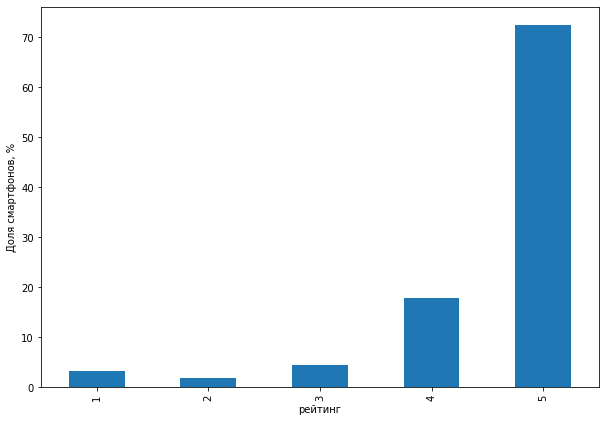

In [5]:
rating_count = df['rating'].value_counts(normalize=True).sort_index()*100.0

fig = plt.figure(figsize=(10, 7))
rating_count.plot.bar(ylabel='Доля смартфонов, %', xlabel='рейтинг');

Более 70% смартфонов, представленных в датасете, имеют максимально возможный рейтинг 5

*Строим 2 боксплота для распределения смартфонов по рейтингу "высокий" (>3) и низкий (<=3)*

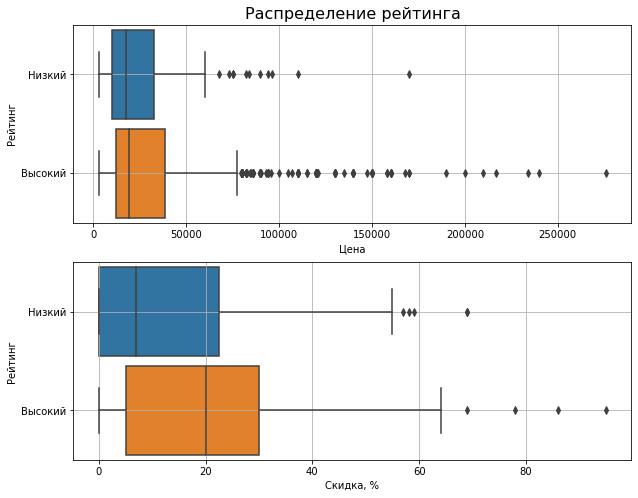

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

boxplot = sns.boxplot(
    data=df,
    y='high_rating',
    x='price',
    orient='h',
    width=0.9,
    ax=axes[0]
)
axes[0].set_title('Распределение рейтинга', fontsize=16)
boxplot.set_xlabel('Цена')
boxplot.set_ylabel('Рейтинг')
boxplot.set_yticklabels(['Низкий','Высокий'])
boxplot.grid();

boxplot = sns.boxplot(
    data=df,
    y='high_rating',
    x='discount',
    orient='h',
    width=0.9,
    ax=axes[1]
)
boxplot.set_xlabel('Скидка, %')
boxplot.set_ylabel('Рейтинг')
boxplot.set_yticklabels(['Низкий','Высокий'])
boxplot.grid();

1. **Для распределения в зависимости от цены** Можно отметить большое количество выбросов для смартфонов с высоким рейтингом. При этом медиана представленных в датасете смартфонов примерно одинакова для смартфонов с высокими и с низким рейтингами.

2. **Для распределения в зависимости от размера скидки в процентах** В этом случае количество выбросов меньше. Можно отметить, что медиана, 25 и 75 перцентили и максимальная величина скидки для смартфонов с высоким ретингом существенно превышают эти величины для смартфонов с низким рейтингом.

*Проанализируем далее распределение основных признаков, представленных в датасете смартфонов*

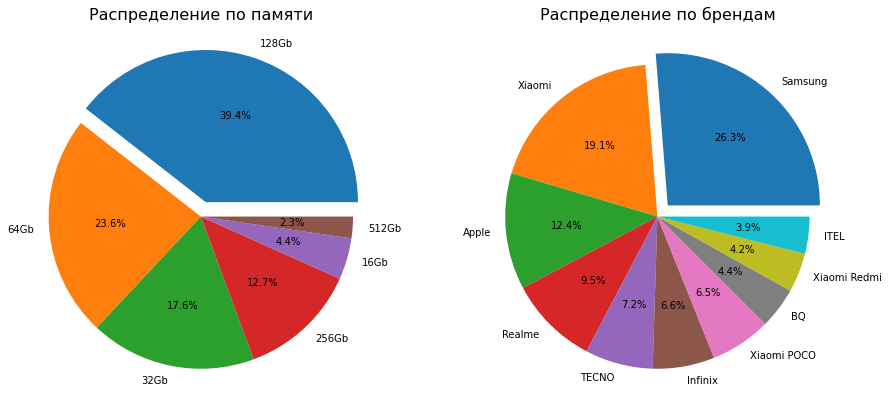

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))

memory_count = df['memory_size'].value_counts()[:6]
memory_count.index = [str(x)+'Gb' for x in memory_count.index]
axes[0].pie(
    memory_count,
    labels=memory_count.index,
    autopct='%.1f%%',
    explode = [0.1, 0, 0, 0, 0, 0]
);
axes[0].set_title('Распределение по памяти', fontsize=16)

Brand_combinations = df['brand'].value_counts()[:10]
axes[1].pie(
    Brand_combinations,
    labels=Brand_combinations.index,
    autopct='%.1f%%',
    explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
);
axes[1].set_title('Распределение по брендам', fontsize=16);

Наиболее часто представлены телефоны с объемом памяти 128Gb, а наиболее широко представленный бренд - Samsung

In [8]:
df.price.sum() 

36202914

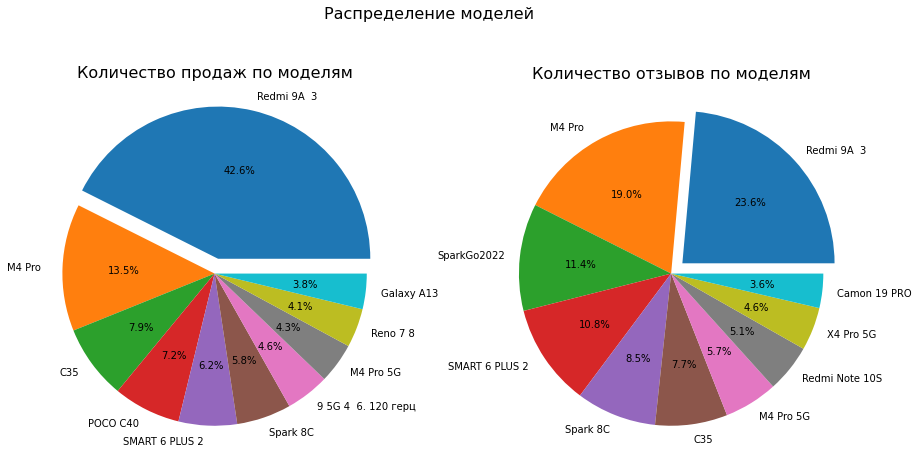

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))
fig.suptitle('Распределение моделей', fontsize=16, y=0.75)

summ_sales_by_name = df.groupby(['name'])[['sales_count']].sum().reset_index()
summ_sales_by_name = summ_sales_by_name.sort_values('sales_count', ascending=False)[:10]
axes[0].pie(
    summ_sales_by_name['sales_count'],
    labels=summ_sales_by_name['name'],
    autopct='%.1f%%',
    explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
);
axes[0].set_title('Количество продаж по моделям', fontsize=16);

summ_feedbacks_by_name = df.groupby(['name'])[['feedbacks']].sum().reset_index()
#summ_feedbacks_by_name = [str(x)+'Gb' for x in summ_feedbacks_by_name.index]
summ_feedbacks_by_name = summ_feedbacks_by_name.sort_values('feedbacks', ascending=False)[:10]
axes[1].pie(
    summ_feedbacks_by_name['feedbacks'],
    labels=summ_feedbacks_by_name['name'],
    autopct='%.1f%%',
    explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
);
axes[1].set_title('Количество отзывов по моделям', fontsize=16);

Наиболее продаваемая модель **Redmi 9A** - 45% всех продаж. По этой же модели больше всего отзывов - 25.6%. На втором месте - **M4 Pro**  с почти 10% продаж и 15% отзывов.

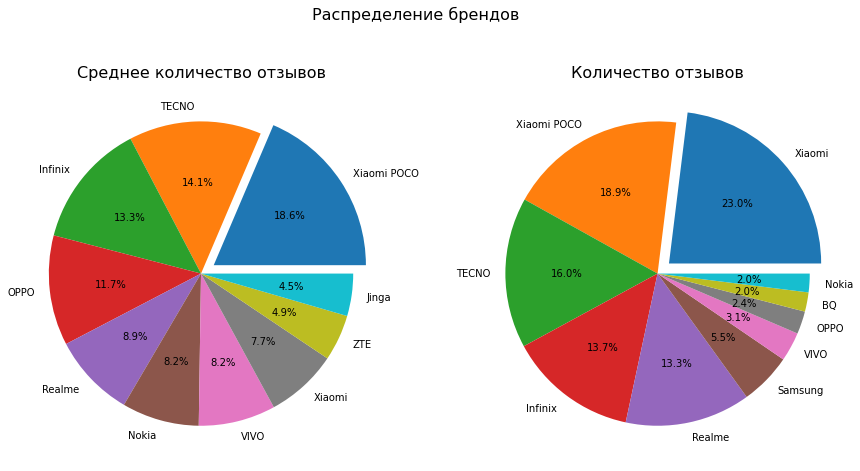

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))
fig.suptitle('Распределение брендов', fontsize=16, y=0.75)

mean_feedbacks_by_brand = df.groupby(['brand'])[['feedbacks']].mean().reset_index()
mean_feedbacks_by_brand = mean_feedbacks_by_brand.sort_values('feedbacks', ascending=False)[:10]
axes[0].pie(
    mean_feedbacks_by_brand['feedbacks'],
    labels=mean_feedbacks_by_brand['brand'],
    autopct='%.1f%%',
    explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
);

axes[0].set_title('Cреднее количество отзывов', fontsize=16)

summ_feedbacks_by_brand = df.groupby(['brand'])[['feedbacks']].sum().reset_index()
summ_feedbacks_by_brand = summ_feedbacks_by_brand.sort_values('feedbacks', ascending=False)[:10]
axes[1].pie(
    summ_feedbacks_by_brand['feedbacks'],
    labels=summ_feedbacks_by_brand['brand'],
    autopct='%.1f%%',
    explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
)
axes[1].set_title('Количество отзывов', fontsize=16);

Наибольшее количество отзывов у смартфонов Xiaomi, при этом по среднему количеству отзывов лидирует Xiaomi POCO, а Xiaomi находится только на 8 месте

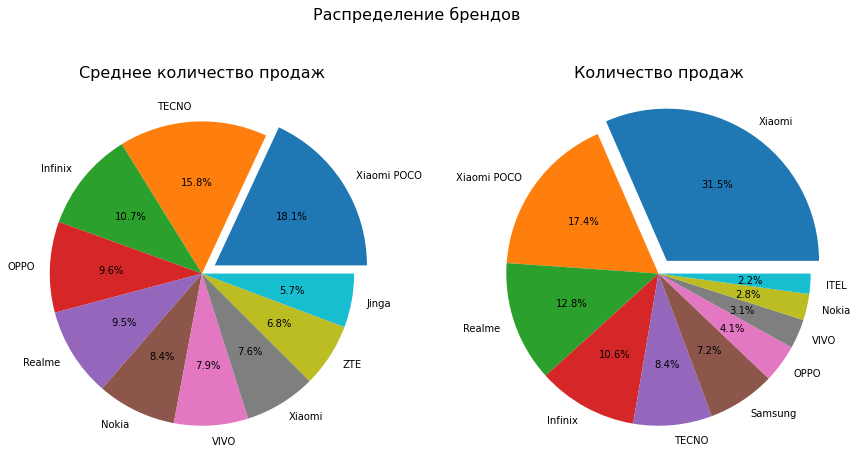

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))
fig.suptitle('Распределение брендов', fontsize=16, y=0.75)

mean_sales_by_brand = df.groupby(['brand'])[['sales_count']].mean().reset_index()
mean_sales_by_brand = mean_sales_by_brand.sort_values('sales_count', ascending=False)[:10]
axes[0].pie(
    mean_sales_by_brand['sales_count'],
    labels=mean_feedbacks_by_brand['brand'],
    autopct='%.1f%%',
    explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
);
axes[0].set_title('Среднее количество продаж', fontsize=16)

summ_sales_by_brand = df.groupby(['brand'])[['sales_count']].sum().reset_index()
summ_sales_by_brand = summ_sales_by_brand.sort_values('sales_count', ascending=False)[:10]
axes[1].pie(
    summ_sales_by_brand['sales_count'],
    labels=summ_sales_by_brand['brand'],
    autopct='%.1f%%',
    explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
);
axes[1].set_title('Количество продаж', fontsize=16);

Аналогичная ситуация и с количеством продаж: лидером по продажам являются смартфоны Xiaomi, однако по среднему количеству продаж они находятся на 8-м месте, лидер - Xiaomi POCO

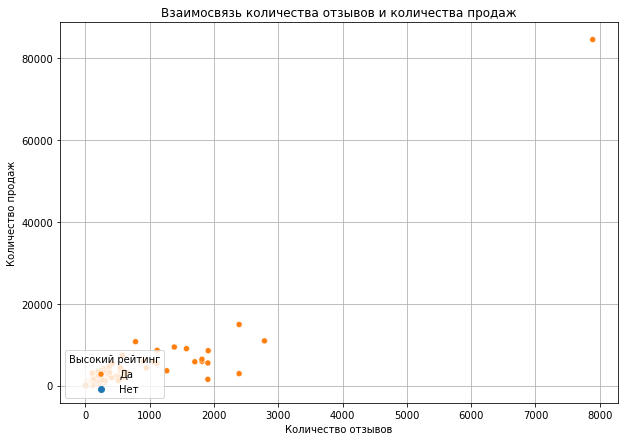

In [14]:
fig = plt.figure(figsize=(10, 7))
scatterplot = sns.scatterplot(
    data=df,
    x="feedbacks",
    y="sales_count",
    hue="high_rating")
scatterplot.set_title('Взаимосвязь количества отзывов и количества продаж')
scatterplot.set_xlabel('Количество отзывов')
scatterplot.set_ylabel('Количество продаж')
scatterplot.legend(title='Высокий рейтинг',
                   loc='lower left',
                   labels=['Да', 'Нет'])
scatterplot.grid();

Введем дополнительный признак "High memory". Будем считать, что память у смартфона "большая", когда memory_size >=128Gb

In [15]:
df['high_memory'] = np.where(df['memory_size'].isin([128, 256, 512, 1024]), 1, 0)
df['high_memory'].value_counts()

1    599
0    517
Name: high_memory, dtype: int64

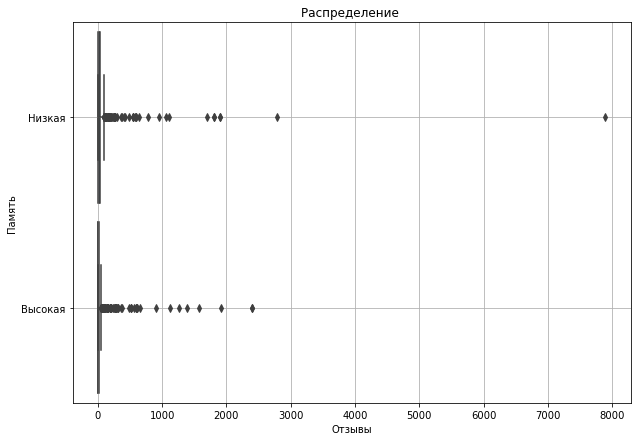

In [16]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=df,
    y='high_memory',
    x='feedbacks',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение ')
boxplot.set_xlabel('Отзывы')
boxplot.set_ylabel('Память')
boxplot.set_yticklabels(['Низкая','Высокая'])
boxplot.grid();

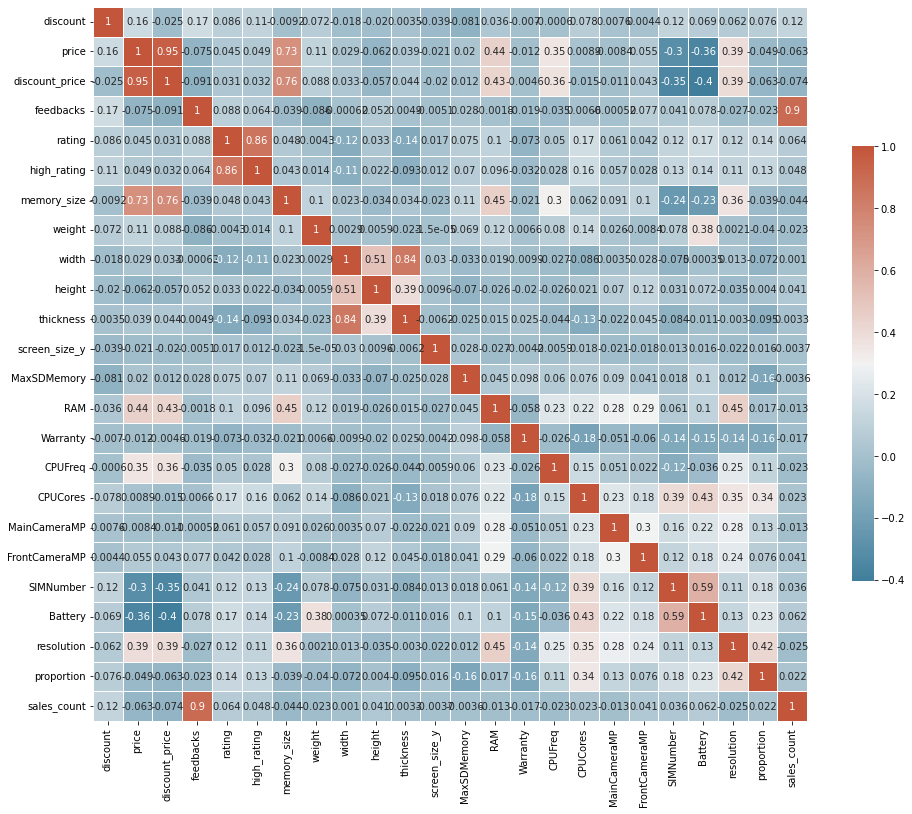

In [49]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
fig = plt.figure(figsize=(16, 16))
sns.heatmap(
    df.corr(),  annot=True, cmap=cmap,
    square=True, linewidths=.5, cbar_kws={"shrink": .5}
);

Построив тепловую карту для некоторых характеристик нашего датасета, можно сделать некоторые выводы:
* больше всего нас интересовало влияние характеристик на **sales_count** и **rating**. Сильной зависимости не наблюдается. **sales_count** сольно коррелируют с **feedbacks**, что вполне логично и объяснимо. Небольшое влияние на **sales_count** оказывает характеристика **discount**. На **raiting** небольшое влияние оказывают размеры телефона, пользователи предпочитают потоньше. Также с **raiting** немного коррелируют **SIMNumber** , **Buttery** , **resolution** и **proportion** , т.е. покупателям больше нравятся телефоны в более емкими батареями и с экранами с более высоким разрешением. 
* наблюдаются коллеляции между техническими характеристиками, некоторые из которых коррклируют с ценой. Чем больше оперативная памать, тем выше разрешение экрана и камер, а так же больше долговременная память, кол-во ядер процессора и цена. На цену также влияют екость батареи, разрешение экрана и объем памяти.

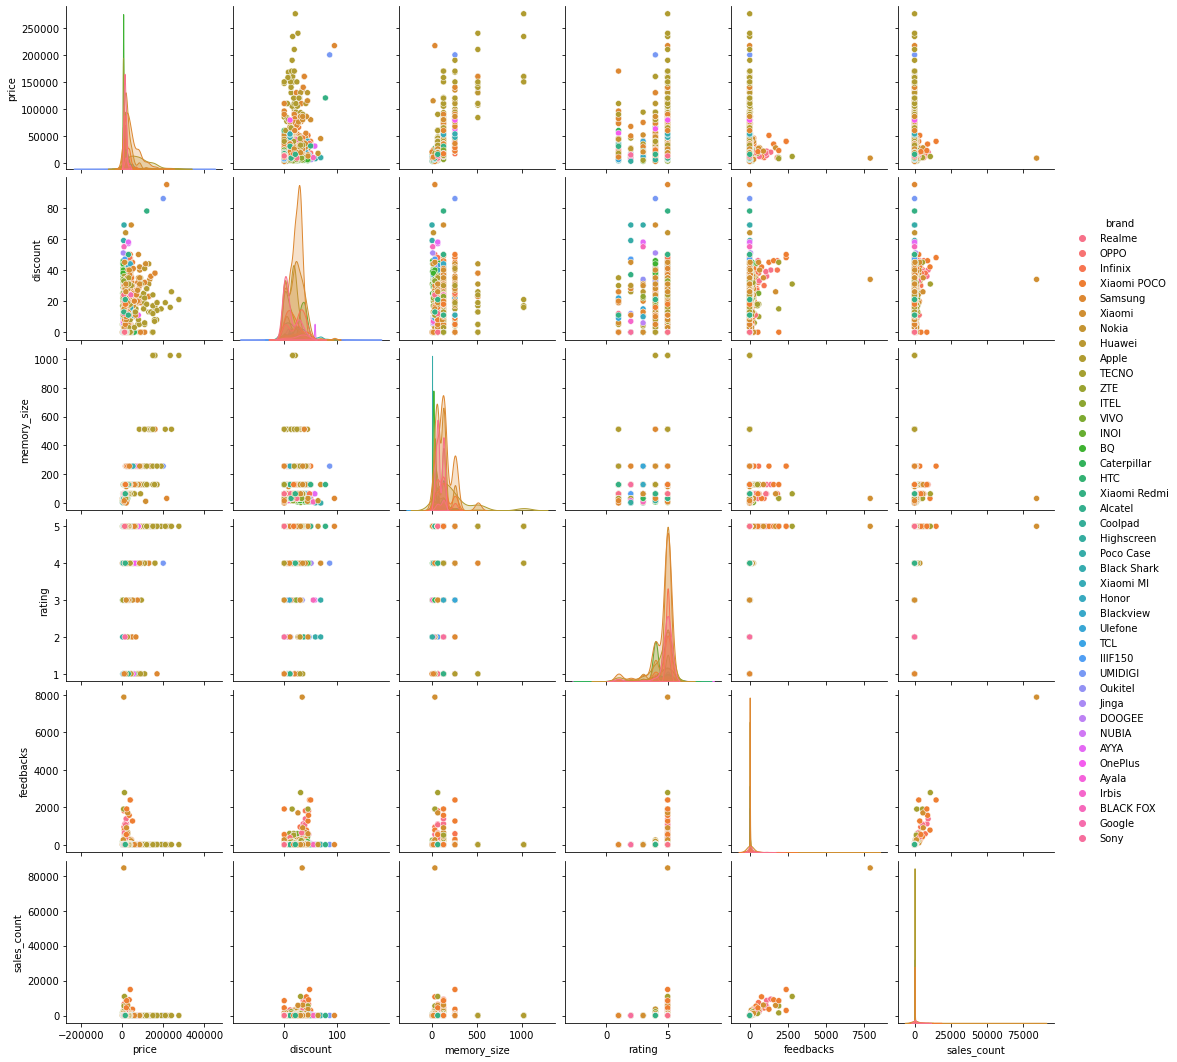

In [30]:
sns.pairplot(
    df[
        [
            'brand', 'price', 'discount',
            'memory_size', 'rating',
            'feedbacks', 'sales_count'
        ]
    ],
    hue="brand"
);

In [32]:
df.to_csv('Dataset_final_V4.csv')